In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib  notebook
plt.style.use('seaborn-pastel')

# Region and Domain
#### Colombia and Spain
#### Health

# Research Question

#### How has the prevalence and incidence of covid-19 cases changed in Colombia and Spain in the period 2020-03-06 to 2020-09-10?

# Liks
#### https://covid19.who.int/WHO-COVID-19-global-data.csv
#### In this dataset I can find what I need.

# Image and Analyst Data 

In [11]:
df = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')
df.columns = ['Date_reported','Country_code', 'Country','Who_region', 'New_cases', 'Cumulative_cases',
              'New_deaths', 'Cumulative_deaths']

In [12]:
Col = df[df['Country'] == 'Colombia']
Col = Col.drop(['Country_code','Who_region','New_deaths', 'Cumulative_deaths'], axis=1)
Spa = df[df['Country'] == 'Spain']
Spa = Spa.drop(['Country_code','Who_region','New_deaths', 'Cumulative_deaths'], axis=1)
result = pd.merge(Col,Spa, how = 'inner', on = ['Date_reported'])
result = result.set_index(['Date_reported'])
Incident = result[['New_cases_x','New_cases_y']]
Incident.columns = ['Incidents Colombia','Incidents Spain']
Prevalence = result[['Cumulative_cases_x','Cumulative_cases_y']]
Prevalence.columns = ['Prevalences Colombia', 'prevalences Spain']

<IPython.core.display.Javascript object>


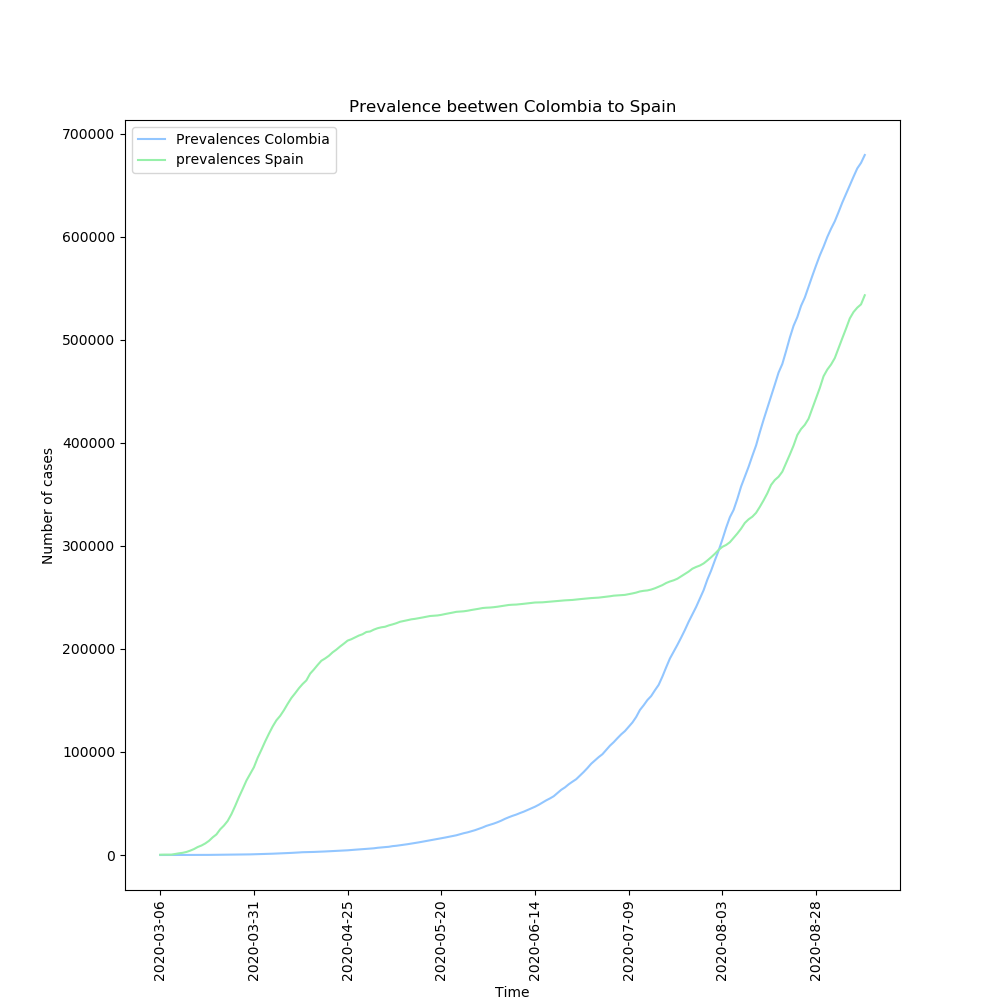

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 10 Text xticklabel objects>)

In [13]:
Prevalence.plot(xlabel ='Time', ylabel = 'Number of cases',figsize=(10,10), title = 'Prevalence beetwen Colombia to Spain')
plt.xticks(rotation='vertical')

<IPython.core.display.Javascript object>


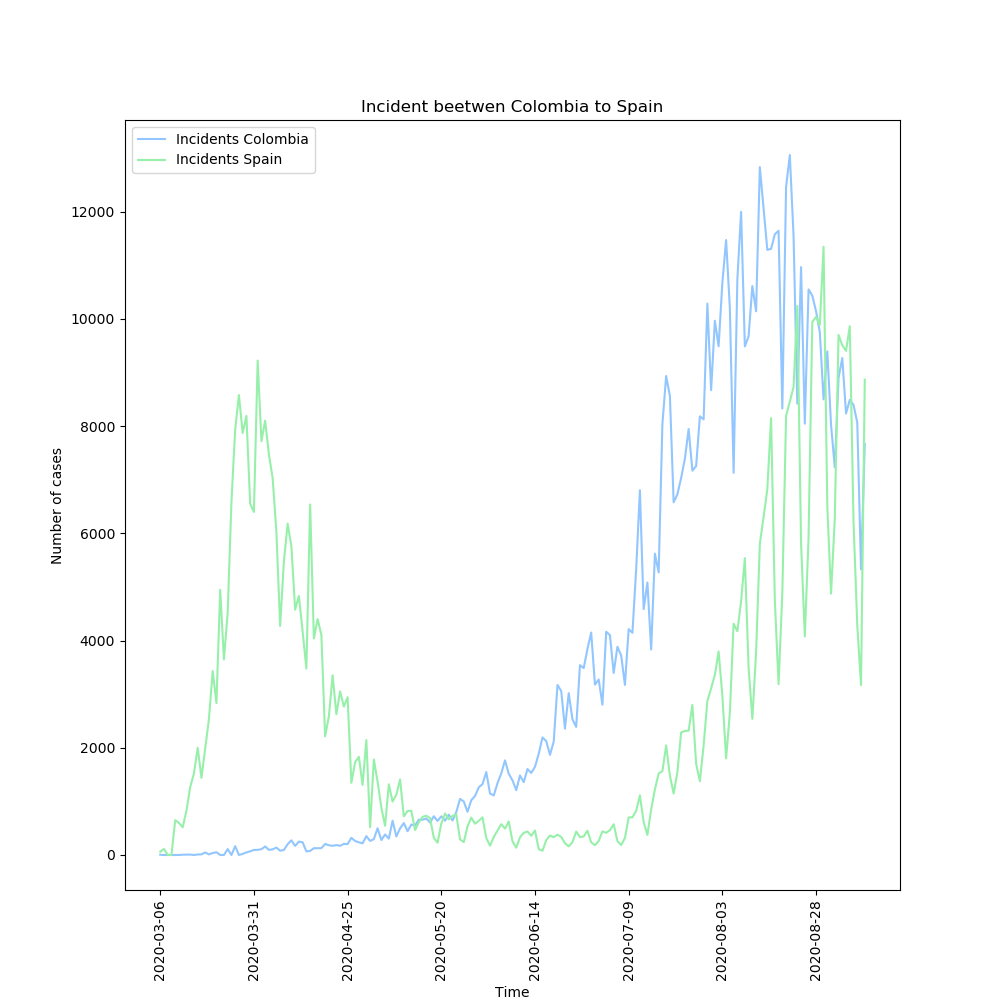

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 10 Text xticklabel objects>)

In [14]:
Incident.plot(xlabel = 'Time', ylabel = 'Number of cases',figsize=(10,10), title = 'Incident beetwen Colombia to Spain')
plt.xticks(rotation='vertical')

In [15]:
Data_incide = Incident.describe()
Data_incide

,Incidents Colombia,Incidents Spain
count,189.000000,189.000000
mean,3595.306878,2873.962963
std,4029.488922,2918.582699
min,0.000000,0.000000
25%,207.000000,532.000000
50%,1515.000000,1563.000000
75%,7254.000000,4517.000000
max,13056.000000,11345.000000


In [16]:
corr_incid = Incident.corr(method='pearson')
corr_incid

,Incidents Colombia,Incidents Spain
Incidents Colombia,1.000000,0.398957
Incidents Spain,0.398957,1.000000


In [17]:
Data_preval = Prevalence.describe()
Data_preval

,Prevalences Colombia,prevalences Spain
count,189.000000,189.000000
mean,146390.624339,237170.492063
std,201302.962780,121244.261182
min,5.000000,261.000000
25%,3977.000000,199355.000000
50%,38027.000000,242964.000000
75%,226373.000000,275120.000000
max,679513.000000,543379.000000


In [18]:
corr_prev = Prevalence.corr(method = 'pearson')
corr_prev

,Prevalences Colombia,prevalences Spain
Prevalences Colombia,1.00000,0.84267
prevalences Spain,0.84267,1.00000


# Discusion
#### In this data visualization, we describe the time series of the prevalence and incidence of covid 19 in Colombia and Spain, in which we can see the growth of each of these variables and their changes.

#### We can see that the mean Incidences value in Colombia is higher than in Spain, but the prevalence in Spain is much higher than in Colombia. Also, we can observe the correlation processes between the incidence data, which has a 40% relationship in the data, but in prevalence there is a 90% relationship between these time lines. This is given thanks to the Pearson correlation coefficient.